In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

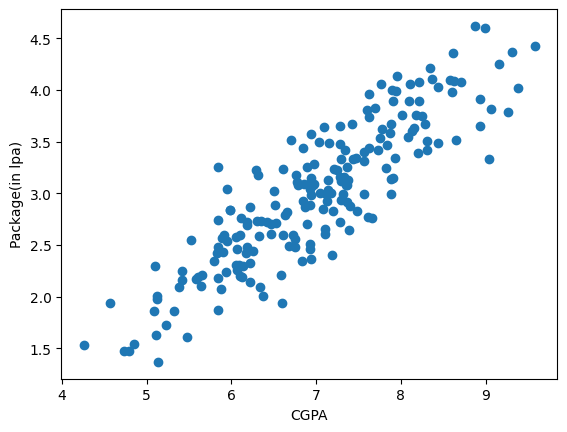

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [88]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]

In [89]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [90]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [92]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [93]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.predict(X_test.values[0].reshape(1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

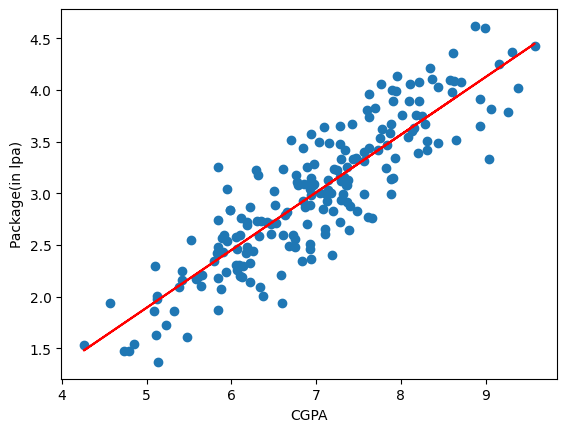

In [98]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

### Calculate ----> MAE - Mean Absolute Error ; MSE - Mean Squared Error ; RMSE - Root Mean Squared Error ; R2-Score

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [101]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [104]:
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [105]:
print('MSE:',mean_squared_error(y_test, y_pred))

MSE: 0.12129235313495527


In [106]:
print('RMSE:',(mean_squared_error(y_test, y_pred))**0.5)

RMSE: 0.34827051717731616


In [110]:
r2 = r2_score(y_test,y_pred)
print('R2-Score:',r2)

R2-Score: 0.780730147510384


In [112]:
# Adjusted R2-Score
X_test.shape

(40, 1)

In [120]:
R2_adj = 1-(((1-r2)*(40-1))/(40-1-1))
R2_adj

0.7749598882343415

#### Randomly adding 1 irrelevent column and checking its effect on R2 and R2_adj

In [121]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.733733,3.26
1,5.12,0.025270,1.98
2,7.82,0.695287,3.25
3,7.42,0.594187,3.67
4,6.94,0.168259,3.57


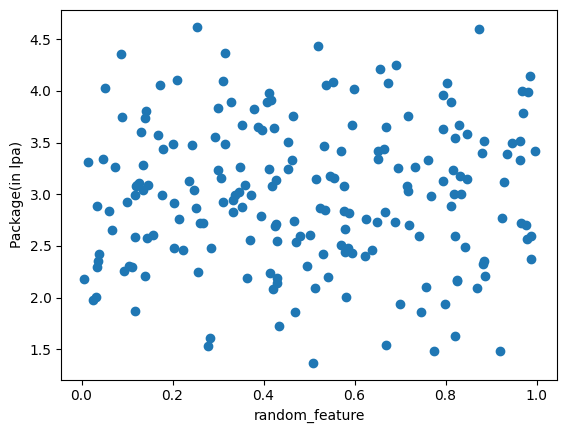

In [123]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')
plt.show()

In [124]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [125]:
X

,cgpa,random_feature
0,6.89,0.733733
1,5.12,0.025270
2,7.82,0.695287
3,7.42,0.594187
4,6.94,0.168259
...,...,...
195,6.93,0.639329
196,5.89,0.980006
197,7.21,0.412209
198,7.63,0.793543


In [126]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [128]:
lr = LinearRegression()

In [129]:
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred = lr.predict(X_test)
y_pred

array([3.89686293, 3.10119405, 2.38579905, 2.56296567, 1.64369863,
       1.76722645, 2.06403189, 2.94077313, 3.75892695, 2.94345053,
       4.09581908, 3.49892731, 2.98294414, 2.40092822, 3.19237206,
       3.4617953 , 1.94326106, 3.24117033, 2.96219024, 3.41499294,
       2.5649645 , 3.16092418, 2.84950852, 3.11627789, 3.67663   ,
       2.87315709, 3.4855598 , 3.35415772, 3.91812157, 1.97203259,
       3.64338246, 3.21845266, 3.74210703, 2.7802833 , 2.76953056,
       3.28420688, 3.52445622, 2.61815325, 2.65507008, 2.71312154])

In [131]:
r2 = r2_score(y_test,y_pred)
print('R2-Score:',r2)

R2-Score: 0.7826896392802121


In [132]:
R2_adj = 1-(((1-r2)*(40-1))/(40-1-1))
R2_adj

0.7769709455770597

#### Randomly adding 1 relevent column and checking its effect on R2 and R2_adj

In [134]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

new_df2.sample(5)

,cgpa,iq,package
68,7.56,2.39,2.99
8,6.09,3.11,2.31
63,9.16,5.15,4.25
23,6.19,3.38,2.48
54,6.86,2.89,3.09


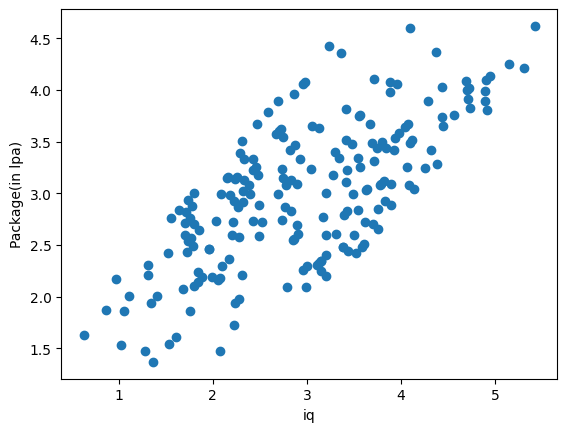

In [136]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')
plt.show()

In [137]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [138]:
X

,cgpa,iq
0,6.89,2.46
1,5.12,2.28
2,7.82,4.25
3,7.42,4.07
4,6.94,2.67
...,...,...
195,6.93,1.96
196,5.89,1.77
197,7.21,3.04
198,7.63,2.86


In [139]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(X_train,y_train)

LinearRegression()

In [144]:
y_pred = lr.predict(X_test)
y_pred

array([4.07952613, 3.20607577, 2.27383727, 2.67599841, 1.60226925,
       1.82932067, 2.02446123, 2.93613931, 4.04021071, 2.8370876 ,
       4.17314679, 3.72699179, 3.13631348, 2.59245237, 3.11851404,
       3.61415632, 1.79941077, 3.39634973, 2.85320001, 3.58363967,
       2.70375408, 3.1599837 , 2.75968399, 3.08563387, 3.58464386,
       2.87950541, 3.59243845, 3.6213653 , 4.06784799, 1.87205243,
       3.58159008, 3.0753711 , 3.51945537, 2.70537874, 2.71239958,
       3.33112635, 3.51350108, 2.5917135 , 2.40837687, 2.75649068])

In [145]:
r2 = r2_score(y_test,y_pred)
print('R2-Score:',r2)

R2-Score: 0.8319573603513066


In [146]:
R2_adj = 1-(((1-r2)*(40-1))/(40-1-1))
R2_adj

0.8275351856237094